## preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import gensim
# from gensim import models
# import re

# add headers
headers = "country,sku_id,title,category_lvl_1,category_lvl_2,category_lvl_3,short_description, price,product_type".split(",")

# create dataframe
data_train = pd.read_csv("Data/training/data_train.csv", names = headers)
clarity_train = pd.read_csv("Data/training/clarity_train.labels", names=['clarity_label'])
conciseness_train = pd.read_csv("Data/training/conciseness_train.labels", names=['conciseness_label'])

data_train['clarity_label'] = clarity_train['clarity_label']
data_train['conciseness_label'] = conciseness_train['conciseness_label']

# # validation
# data_validate = pd.read_csv("Data/validation/data_valid.csv", names = headers)

data_train.head()

,country,sku_id,title,category_lvl_1,category_lvl_2,category_lvl_3,short_description,price,product_type,clarity_label,conciseness_label
0,my,AD674FAASTLXANMY,Adana Gallery Suri Square Hijab – Light Pink,Fashion,Women,Muslim Wear,<ul><li>Material : Non sheer shimmer chiffon</...,49.00,local,1,1
1,my,AE068HBAA3RPRDANMY,Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz,Health & Beauty,Bath & Body,Hand & Foot Care,Formulated with oil-free hydrating botanicals/...,128.00,international,1,1
2,my,AN680ELAA9VN57ANMY,Andoer 150cm Cellphone Smartphone Mini Dual-He...,"TV, Audio / Video, Gaming & Wearables",Audio,Live Sound & Stage,<ul> <li>150cm mini microphone compatible for ...,25.07,international,1,0
3,my,AN957HBAAAHDF4ANMY,ANMYNA Complaint Silky Set 柔顺洗发配套 (Shampoo 520...,Health & Beauty,Hair Care,Shampoos & Conditioners,<ul> <li>ANMYNA Complaint Silky Set (Shampoo 5...,118.00,local,1,1
4,my,AR511HBAXNWAANMY,Argital Argiltubo Green Clay For Face and Body...,Health & Beauty,Men's Care,Body and Skin Care,<ul> <li>100% Authentic</li> <li>Rrefresh and ...,114.80,international,1,1


In [3]:
#try
len(data_train)

36283

In [4]:
import re 
import nltk
nltk.download(['stopwords'])
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup

def clean_text(text): 
    if text != text: 
        text = ' '
#     text = text.encode('utf_8').decode('unicode_escape')
    if bool(BeautifulSoup(text, "html.parser").find()):
        text = BeautifulSoup(text, "html5lib").text
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

[nltk_data] Downloading package stopwords to /Users/v/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# clean title for training dataframe
data_train['clean_title'] = data_train.title.apply(clean_text)

In [312]:
import re 
import nltk
nltk.download(['stopwords'])
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup

def clean_sd(text): 
    if text != text: 
        text = ' '
    if text.startswith("\\"):
        text = text.encode('utf_8').decode('unicode_escape')
    if bool(BeautifulSoup(text, "html.parser").find()):
        text = BeautifulSoup(text, "html5lib").text
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

[nltk_data] Downloading package stopwords to /Users/v/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [318]:
#try
# for i in range(0, len(data_train)):
clean_sd(data_train['short_description'][10002])

'full auto calendarhourli time signalalarmwat resist'

In [314]:
# clean short description for training dataframe
data_train['clean_sd'] = data_train.short_description.apply(clean_sd)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [315]:
data_train.head()

,country,sku_id,title,category_lvl_1,category_lvl_2,category_lvl_3,short_description,price,product_type,clarity_label,conciseness_label,clean_title,clean_sd
0,my,AD674FAASTLXANMY,Adana Gallery Suri Square Hijab – Light Pink,Fashion,Women,Muslim Wear,<ul><li>Material : Non sheer shimmer chiffon</...,49.00,local,1,1,adana galleri suri squar hijab light pink,materi non sheer shimmer chiffons 52 x 52 inch...
1,my,AE068HBAA3RPRDANMY,Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz,Health & Beauty,Bath & Body,Hand & Foot Care,Formulated with oil-free hydrating botanicals/...,128.00,international,1,1,cuba heartbreak eau de parfum spray 100ml 3 3oz,formul oil free hydrat botan remark improv ski...
2,my,AN680ELAA9VN57ANMY,Andoer 150cm Cellphone Smartphone Mini Dual-He...,"TV, Audio / Video, Gaming & Wearables",Audio,Live Sound & Stage,<ul> <li>150cm mini microphone compatible for ...,25.07,international,1,0,andoer 150cm cellphon smartphon mini dual head...,150cm mini microphon compat iphon variou smart...
3,my,AN957HBAAAHDF4ANMY,ANMYNA Complaint Silky Set 柔顺洗发配套 (Shampoo 520...,Health & Beauty,Hair Care,Shampoos & Conditioners,<ul> <li>ANMYNA Complaint Silky Set (Shampoo 5...,118.00,local,1,1,anmyna complaint silki set shampoo 520ml condi...,anmyna complaint silki set shampoo 520ml condi...
4,my,AR511HBAXNWAANMY,Argital Argiltubo Green Clay For Face and Body...,Health & Beauty,Men's Care,Body and Skin Care,<ul> <li>100% Authentic</li> <li>Rrefresh and ...,114.80,international,1,1,argit argiltubo green clay face bodi 250ml,100 authent rrefresh brighten skin anti wrinkl...


In [316]:
# save clean title & short description training dataframe
data_train.to_csv('data_train_clean.csv', encoding='utf-8', index=False)

## Model

In [393]:
#try: if there's correlation between clarity and conciseness
# from pylab import randn
import numpy as np
X = data_train['clarity_label'][:]
Y = data_train['conciseness_label'][:]
# plt.scatter(X,Y)
# plt.show()
np.corrcoef(X, Y)

array([[ 1.       ,  0.3616114],
       [ 0.3616114,  1.       ]])

In [430]:
#try
# import spacy
# nlp = spacy.load('en')
# nlp(data_train['clean_title'][44]).similarity(nlp(data_train['clean_sd'][44]))
# data_train.loc['similarity'][44] = nlp(data_train['clean_title'][44]).similarity(nlp(data_train['clean_sd'][44]))
# data_train.loc['similarity'][44]

KeyError: 'the label [similarity] is not in the [index]'

In [409]:
#try
# import spacy
# def get_similarity(text1, text2): 
#     nlp = spacy.load('en')
#     text_similarity = nlp(text1).similarity(nlp(text2))
#     return text_similarity

#### similarity by spacy

In [438]:
# get similarity bewteen title and short description for training dataframe

text_similarity = []
import spacy
nlp = spacy.load('en')
for i in range(0, len(data_train)):
    text_similarity.append(nlp(data_train['clean_title'][i]).similarity(nlp(data_train['clean_sd'][i])))

# data_train['similarity'] = data_train.index
data_train['similarity'] = text_similarity

In [439]:
# # del data_train['similarity']
data_train.head()

,country,sku_id,title,category_lvl_1,category_lvl_2,category_lvl_3,short_description,price,product_type,clarity_label,conciseness_label,clean_title,clean_sd,similarity
0,my,AD674FAASTLXANMY,Adana Gallery Suri Square Hijab – Light Pink,Fashion,Women,Muslim Wear,<ul><li>Material : Non sheer shimmer chiffon</...,49.00,local,1,1,adana galleri suri squar hijab light pink,materi non sheer shimmer chiffons 52 x 52 inch...,0.577528
1,my,AE068HBAA3RPRDANMY,Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz,Health & Beauty,Bath & Body,Hand & Foot Care,Formulated with oil-free hydrating botanicals/...,128.00,international,1,1,cuba heartbreak eau de parfum spray 100ml 3 3oz,formul oil free hydrat botan remark improv ski...,0.648853
2,my,AN680ELAA9VN57ANMY,Andoer 150cm Cellphone Smartphone Mini Dual-He...,"TV, Audio / Video, Gaming & Wearables",Audio,Live Sound & Stage,<ul> <li>150cm mini microphone compatible for ...,25.07,international,1,0,andoer 150cm cellphon smartphon mini dual head...,150cm mini microphon compat iphon variou smart...,0.947894
3,my,AN957HBAAAHDF4ANMY,ANMYNA Complaint Silky Set 柔顺洗发配套 (Shampoo 520...,Health & Beauty,Hair Care,Shampoos & Conditioners,<ul> <li>ANMYNA Complaint Silky Set (Shampoo 5...,118.00,local,1,1,anmyna complaint silki set shampoo 520ml condi...,anmyna complaint silki set shampoo 520ml condi...,0.940997
4,my,AR511HBAXNWAANMY,Argital Argiltubo Green Clay For Face and Body...,Health & Beauty,Men's Care,Body and Skin Care,<ul> <li>100% Authentic</li> <li>Rrefresh and ...,114.80,international,1,1,argit argiltubo green clay face bodi 250ml,100 authent rrefresh brighten skin anti wrinkl...,0.794945


In [442]:
# save training dataframe with similarity by using spacy
data_train.to_csv('data_train_clean_similarity.csv', encoding='utf-8', index=False)

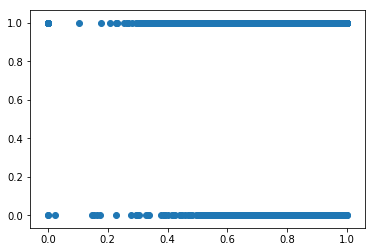

array([[ 1.        , -0.02462279],
       [-0.02462279,  1.        ]])

In [441]:
import numpy as np
# X = data_train['clarity_label'][:]
X = data_train['similarity'][:]
Y = data_train['clarity_label'][:]
plt.scatter(X,Y)
plt.show()
np.corrcoef(X, Y)

#### Another similairty: consine similairty by nltk

In [443]:
# cosine similarity between title and description
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

def cos_similarity(text1, text2): 
    vect = TfidfVectorizer(min_df = 1)
    tfidf = vect.fit_transform([text1, text2])
    similarity = ((tfidf * tfidf.T).A)[0,1]
    return similarity

In [450]:
text_similarity = []
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df = 1)
for i in range(0, len(data_train)):
    tfidf = vect.fit_transform([data_train['clean_title'][i], data_train['clean_sd'][i]])
    text_similarity.append(((tfidf * tfidf.T).A)[0,1])

data_train['csimilarity'] = data_train.index
data_train['csimilarity'] = text_similarity

In [454]:
data_train.head()

,country,sku_id,title,category_lvl_1,category_lvl_2,category_lvl_3,short_description,price,product_type,clarity_label,conciseness_label,clean_title,clean_sd,similarity,csimilarity
0,my,AD674FAASTLXANMY,Adana Gallery Suri Square Hijab – Light Pink,Fashion,Women,Muslim Wear,<ul><li>Material : Non sheer shimmer chiffon</...,49.00,local,1,1,adana galleri suri squar hijab light pink,materi non sheer shimmer chiffons 52 x 52 inch...,0.577528,0.000000
1,my,AE068HBAA3RPRDANMY,Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz,Health & Beauty,Bath & Body,Hand & Foot Care,Formulated with oil-free hydrating botanicals/...,128.00,international,1,1,cuba heartbreak eau de parfum spray 100ml 3 3oz,formul oil free hydrat botan remark improv ski...,0.648853,0.000000
2,my,AN680ELAA9VN57ANMY,Andoer 150cm Cellphone Smartphone Mini Dual-He...,"TV, Audio / Video, Gaming & Wearables",Audio,Live Sound & Stage,<ul> <li>150cm mini microphone compatible for ...,25.07,international,1,0,andoer 150cm cellphon smartphon mini dual head...,150cm mini microphon compat iphon variou smart...,0.947894,0.278397
3,my,AN957HBAAAHDF4ANMY,ANMYNA Complaint Silky Set 柔顺洗发配套 (Shampoo 520...,Health & Beauty,Hair Care,Shampoos & Conditioners,<ul> <li>ANMYNA Complaint Silky Set (Shampoo 5...,118.00,local,1,1,anmyna complaint silki set shampoo 520ml condi...,anmyna complaint silki set shampoo 520ml condi...,0.940997,0.502329
4,my,AR511HBAXNWAANMY,Argital Argiltubo Green Clay For Face and Body...,Health & Beauty,Men's Care,Body and Skin Care,<ul> <li>100% Authentic</li> <li>Rrefresh and ...,114.80,international,1,1,argit argiltubo green clay face bodi 250ml,100 authent rrefresh brighten skin anti wrinkl...,0.794945,0.000000


In [461]:
data_train.to_csv('data_train_clean_similarity_cos.csv', encoding='utf-8', index=False)

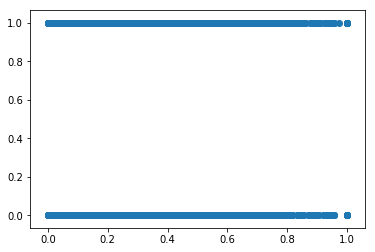

array([[ 1.        , -0.05015855],
       [-0.05015855,  1.        ]])

In [453]:
import numpy as np
# X = data_train['clarity_label'][:]
X = data_train['csimilarity'][:]
Y = data_train['conciseness_label'][:]
plt.scatter(X,Y)
plt.show()
np.corrcoef(X, Y)

#### Train a Classifier 

In [456]:
data_train.columns

Index(['country', 'sku_id', 'title', 'category_lvl_1', 'category_lvl_2',
       'category_lvl_3', 'short_description', ' price', 'product_type',
       'clarity_label', 'conciseness_label', 'clean_title', 'clean_sd',
       'similarity', 'csimilarity'],
      dtype='object')

In [458]:
category_lvl_1_counts = data_train['category_lvl_1'].value_counts()
category_lvl_1_counts

Mobiles & Tablets                        7277
Home & Living                            6048
Fashion                                  5729
Watches Sunglasses Jewellery             4216
Health & Beauty                          4040
Computers & Laptops                      2925
TV, Audio / Video, Gaming & Wearables    2511
Cameras                                  1952
Home Appliances                          1585
Name: category_lvl_1, dtype: int64

In [459]:
category_lvl_2_counts = data_train['category_lvl_2'].value_counts()
category_lvl_2_counts

Accessories                 6903
Women                       3944
Watches                     2063
Jewellery                   1708
Men                         1609
Computer Accessories        1480
Home Improvement            1259
Home Décor                  1192
Audio                       1167
Kitchen & Dining            1006
Makeup                       913
Camera Accessories           782
Small Kitchen Appliances     661
Storage                      603
Skin Care                    555
Stationery                   533
Lighting                     528
Gadgets & Other Cameras      505
Wearable Technology          483
Food Supplements             458
Eyewear                      445
Beauty Tools                 428
Hair Care                    426
Furniture                    403
Bedding                      356
Cooling & Heating            345
Large Appliances             344
Fragrances                   342
Bath & Body                  333
Storage & Organisation       328
Medical Su

In [460]:
category_lvl_3_counts = data_train['category_lvl_3'].value_counts()
category_lvl_3_counts

Phone Cases                           4084
Women                                 2643
Clothing                              2541
Men                                   1471
Bags                                   873
Shoes                                  831
Accessories                            570
Headphones & Headsets                  544
Wall Art                               498
Wallets & Accessories                  449
Batteries                              442
Screen Protectors                      421
Cables                                 376
Lingerie, Sleep & Lounge               343
Battery Adaptors                       341
Other Home Decorations                 338
Kitchen Tools & Accessories            285
Flash Drives                           259
Sports & Action Camera Accessories     252
Makeup Accessories                     243
Tableware                              240
Spy Cameras                            227
Portable Speakers                      222
Chargers   

In [1]:
#try
data_train['clarity_label'][44]

NameError: name 'data_train' is not defined

In [377]:
#try
data_train['conciseness_label'][44]

0

In [382]:
#try
cos_similarity(data_train['clean_title'][44], data_train['clean_sd'][44])

0.77651453047451535

In [420]:
# data_train['similarity'][1] = nlp(data_train['clean_title'][1]).similarity(nlp(data_train['clean_sd'][1]))
data_train['similarity'][1].set_value(nlp(data_train['clean_title'][1]).similarity(nlp(data_train['clean_sd'][1])))


AttributeError: 'numpy.int64' object has no attribute 'set_value'

In [ ]:
# df['col_3'] = df[['col_1','col_2']].apply(lambda x: f(*x), axis=1)

In [410]:
# a = get_similarity(data_train['clean_title'][44], data_train['clean_sd'][44])
# a

0.96205070161302098

In [383]:
# data_train['clarity_label'][43]

0

In [384]:
# data_train['conciseness_label'][43]

0

In [385]:
# cos_similarity(data_train['clean_title'][43], data_train['clean_sd'][43])

0.19431434016858146

In [386]:
import spacy
nlp = spacy.load('en')
nlp(data_train['clean_title'][44]).similarity(nlp(data_train['clean_sd'][43]))

0.72755348648958285

In [406]:
data_train['similarity'] = data_train[['clean_title','clean_sd']].apply(get_similarity, axis=1)

TypeError: ("get_similarity() missing 1 required positional argument: 'text2'", 'occurred at index 0')

In [353]:
#try
# for i in range(0, len(data_train)):
#     data_train['similarity'][i] = cos_similarity(data_train['clean_title'][i], data_train['clean_sd'][i])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [415]:
data_train.head()

,country,sku_id,title,category_lvl_1,category_lvl_2,category_lvl_3,short_description,price,product_type,clarity_label,conciseness_label,clean_title,clean_sd,similarity
0,my,AD674FAASTLXANMY,Adana Gallery Suri Square Hijab – Light Pink,Fashion,Women,Muslim Wear,<ul><li>Material : Non sheer shimmer chiffon</...,49.00,local,1,1,adana galleri suri squar hijab light pink,materi non sheer shimmer chiffons 52 x 52 inch...,0
1,my,AE068HBAA3RPRDANMY,Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz,Health & Beauty,Bath & Body,Hand & Foot Care,Formulated with oil-free hydrating botanicals/...,128.00,international,1,1,cuba heartbreak eau de parfum spray 100ml 3 3oz,formul oil free hydrat botan remark improv ski...,0
2,my,AN680ELAA9VN57ANMY,Andoer 150cm Cellphone Smartphone Mini Dual-He...,"TV, Audio / Video, Gaming & Wearables",Audio,Live Sound & Stage,<ul> <li>150cm mini microphone compatible for ...,25.07,international,1,0,andoer 150cm cellphon smartphon mini dual head...,150cm mini microphon compat iphon variou smart...,0
3,my,AN957HBAAAHDF4ANMY,ANMYNA Complaint Silky Set 柔顺洗发配套 (Shampoo 520...,Health & Beauty,Hair Care,Shampoos & Conditioners,<ul> <li>ANMYNA Complaint Silky Set (Shampoo 5...,118.00,local,1,1,anmyna complaint silki set shampoo 520ml condi...,anmyna complaint silki set shampoo 520ml condi...,0
4,my,AR511HBAXNWAANMY,Argital Argiltubo Green Clay For Face and Body...,Health & Beauty,Men's Care,Body and Skin Care,<ul> <li>100% Authentic</li> <li>Rrefresh and ...,114.80,international,1,1,argit argiltubo green clay face bodi 250ml,100 authent rrefresh brighten skin anti wrinkl...,0


In [7]:
titles = data_train.title_clean.tolist()
sentences = [ models.doc2vec.LabeledSentence(words=s.split(" "), tags=[s.replace(" ", "_")]) for s in titles ]

In [8]:
model = gensim.models.Doc2Vec(size=300, window=10, min_count=5, 
                              workers=4,alpha=0.025, min_alpha=0.025)

In [9]:
voca = model.build_vocab(sentences)

In [10]:
model.iter

5

In [11]:
for epoch in range(10):
    model.train(sentences, total_words=1000,epochs=model.iter)
    model.alpha -= 0.002  # decrease the learning rate`
    model.min_alpha = model.alpha  # fix the learning rate, no decay

In [12]:
model.save("model.doc2vec")


In [13]:
def vector_title(title, w2v_model):
    title = title.split(" ")
    vec = np.zeros(300)
    for w in title:
        try:
            vec += w2v_model.infer_vector(w)
        except:
            pass

    return vec

In [14]:
vector_title("xiaomi phone", model)
data_train['vector_title'] = data_train.title_clean.apply(lambda t: vector_title(t, model))